# Download dataset dari kaggle

In [1]:
!kaggle datasets download -d fathurrahmanalfarizy/sampah-daur-ulang

Dataset URL: https://www.kaggle.com/datasets/fathurrahmanalfarizy/sampah-daur-ulang
License(s): unknown
 92% 91.0M/98.5M [00:00<00:00, 98.4MB/s]
100% 98.5M/98.5M [00:01<00:00, 98.7MB/s]


In [2]:
!unzip sampah-daur-ulang.zip

Streaming output truncated to the last 5000 lines.
  inflating: DATASETS/Kertas/R_3128.jpg  
  inflating: DATASETS/Kertas/R_3129.jpg  
  inflating: DATASETS/Kertas/R_3130.jpg  
  inflating: DATASETS/Kertas/R_3131.jpg  
  inflating: DATASETS/Kertas/R_3132.jpg  
  inflating: DATASETS/Kertas/R_3133.jpg  
  inflating: DATASETS/Kertas/R_3134.jpg  
  inflating: DATASETS/Kertas/R_3135.jpg  
  inflating: DATASETS/Kertas/R_3136.jpg  
  inflating: DATASETS/Kertas/R_3137.jpg  
  inflating: DATASETS/Kertas/R_3138.jpg  
  inflating: DATASETS/Kertas/R_3139.jpg  
  inflating: DATASETS/Kertas/R_3140.jpg  
  inflating: DATASETS/Kertas/R_3141.jpg  
  inflating: DATASETS/Kertas/R_3142.jpg  
  inflating: DATASETS/Kertas/R_3143.jpg  
  inflating: DATASETS/Kertas/R_3144.jpg  
  inflating: DATASETS/Kertas/R_3145.jpg  
  inflating: DATASETS/Kertas/R_3146.jpg  
  inflating: DATASETS/Kertas/R_3147.jpg  
  inflating: DATASETS/Kertas/R_3148.jpg  
  inflating: DATASETS/Kertas/R_3149.jpg  
  inflating: DATASETS/Ker

In [5]:
import os
import cv2
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import shutil
from sklearn.model_selection import train_test_split
import os
import shutil
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Jumlah dataset

In [ ]:
dataset_path = "DATASETS"

# Mendapatkan nama folder (kelas)
classes = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Menghitung jumlah gambar di setiap kelas dan total dataset
total_images = 0
print("Total Images Per Class:")
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    num_images = len([img for img in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, img))])
    total_images += num_images
    print(f" - {cls}: {num_images} images")

print(f"\nTotal Dataset: {total_images} images")


Total Images Per Class:
 - Kaca: 1110 images
 - Kardus: 624 images
 - Kertas: 1807 images
 - Plastik: 1257 images
 - Residu: 1006 images
 - Logam: 1210 images

Total Dataset: 7014 images


# Distribusi dataset

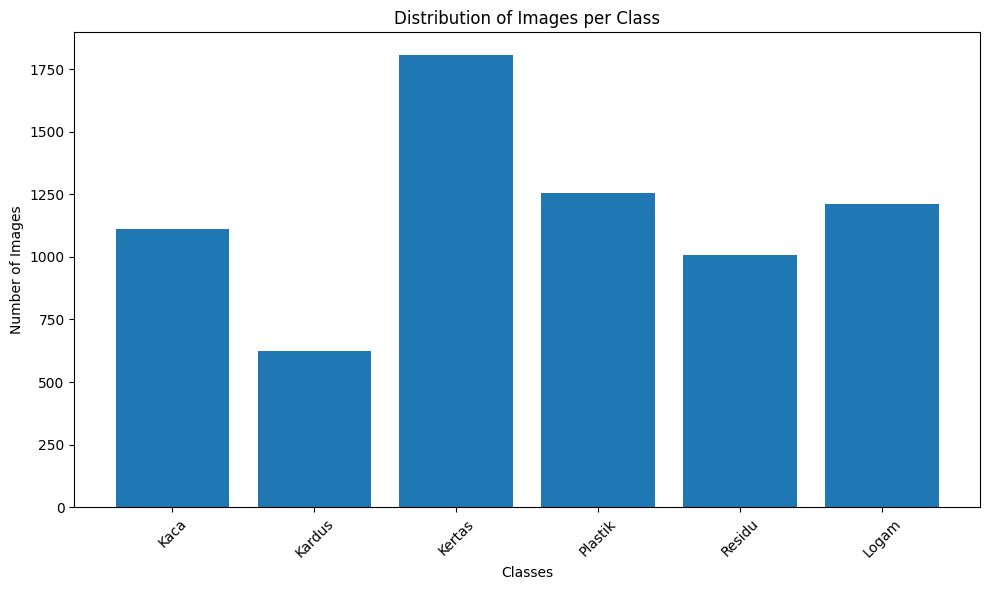

In [ ]:
dataset_path = "DATASETS"
classes = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Menghitung jumlah file di setiap kelas
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}

# Membuat grafik distribusi
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Path ke folder dataset
dataset_path = "DATASETS"

# Mendapatkan nama folder (kelas)
classes = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# List untuk menyimpan informasi ukuran gambar
image_sizes = []

# Iterasi tiap kelas
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    print(f"Class: {cls}")
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            # Membaca gambar dan mendapatkan ukurannya
            with Image.open(img_path) as img:
                width, height = img.size
                print(f" - Image: {img_name}, Size: {width}x{height}")
        except Exception as e:
            print(f"Error reading image {img_path}: {e}")

Streaming output truncated to the last 5000 lines.
 - Image: R_3024.jpg, Size: 178x283
 - Image: R_6746.jpg, Size: 287x176
 - Image: R_5835.jpg, Size: 205x246
 - Image: R_4450.jpg, Size: 267x189
 - Image: R_4870.jpg, Size: 267x189
 - Image: R_3036.jpg, Size: 186x271
 - Image: R_6293.jpg, Size: 300x168
 - Image: R_3083.jpg, Size: 204x247
 - Image: R_6425.jpg, Size: 275x183
 - Image: R_6337.jpg, Size: 276x183
 - Image: R_6369.jpg, Size: 200x200
 - Image: R_6773.jpg, Size: 224x225
 - Image: R_4333.jpg, Size: 276x183
 - Image: R_2888.jpg, Size: 274x184
 - Image: R_6713.jpg, Size: 174x290
 - Image: R_6836.jpg, Size: 259x194
 - Image: R_4645.jpg, Size: 225x225
 - Image: R_6493.jpg, Size: 281x180
 - Image: R_3037.jpg, Size: 188x268
 - Image: R_6267.jpg, Size: 276x183
 - Image: R_6577.jpg, Size: 290x174
 - Image: R_6316.jpg, Size: 310x163
 - Image: R_4361.jpg, Size: 242x209
 - Image: R_5771.jpg, Size: 225x225
 - Image: R_6776.jpg, Size: 200x200
 - Image: R_6278.jpg, Size: 276x182
 - Image: R_2

# Augmentasi

In [6]:
# Path input dan output dataset
input_dataset_path = "DATASETS"
output_dataset_path = "NEW_DATASETS"

# Target jumlah gambar untuk setiap kelas
target_images = 1800

# Pastikan folder output utama ada
os.makedirs(output_dataset_path, exist_ok=True)

# Augmentasi dengan ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

# Iterasi untuk semua kelas
for class_name in os.listdir(input_dataset_path):
    class_input_path = os.path.join(input_dataset_path, class_name)
    class_output_path = os.path.join(output_dataset_path, class_name)

    # Cek apakah folder, dan buat folder output jika belum ada
    if os.path.isdir(class_input_path):
        os.makedirs(class_output_path, exist_ok=True)

        # Salin semua file asli ke folder tujuan
        print(f"Copying original images for class '{class_name}'...")
        for img_name in os.listdir(class_input_path):
            src_path = os.path.join(class_input_path, img_name)
            dst_path = os.path.join(class_output_path, img_name)
            if os.path.isfile(src_path):
                shutil.copy2(src_path, dst_path)

        # Hitung jumlah gambar saat ini dan augmentasi yang diperlukan
        current_images = len(os.listdir(class_input_path))
        images_to_add = target_images - current_images

        if images_to_add > 0:
            augment_per_image = max(1, images_to_add // current_images)
            print(f"Generating augmented images for class '{class_name}'...")

            augment_count = 0
            for img_name in os.listdir(class_input_path):
                img_path = os.path.join(class_input_path, img_name)
                try:
                    # Membuka gambar
                    img = Image.open(img_path)
                    original_mode = img.mode  # Simpan mode asli (RGB atau L)

                    # Konversi ke RGB untuk augmentasi
                    if img.mode != 'RGB':
                        img = img.convert('RGB')

                    # Resize jika diperlukan
                    img = img.resize((224, 224))
                    img_array = np.expand_dims(np.array(img), axis=0)

                    # Generator augmentasi
                    aug_iter = datagen.flow(img_array, batch_size=1)

                    # Simpan beberapa gambar hasil augmentasi
                    for i in range(augment_per_image):
                        if augment_count >= images_to_add:
                            break
                        augmented_image = next(aug_iter)[0].astype("uint8")
                        augmented_image = Image.fromarray(augmented_image)

                        # Kembalikan ke mode asli jika perlu
                        if original_mode == 'L':  # Jika awalnya grayscale
                            augmented_image = augmented_image.convert('L')

                        # Simpan gambar augmented
                        augmented_image.save(os.path.join(class_output_path, f"aug_{augment_count}.jpg"))
                        augment_count += 1

                except Exception as e:
                    print(f"Error processing image {img_name}: {e}")

            print(f"Class '{class_name}': {augment_count} augmented images created.\n")
        else:
            print(f"No augmentation needed for class '{class_name}'.\n")

print(f"Dataset updated! Augmentation completed for all classes.")


Copying original images for class 'Kaca'...
Generating augmented images for class 'Kaca'...
Class 'Kaca': 690 augmented images created.

Copying original images for class 'Kardus'...
Generating augmented images for class 'Kardus'...
Class 'Kardus': 624 augmented images created.

Copying original images for class 'Kertas'...
No augmentation needed for class 'Kertas'.

Copying original images for class 'Plastik'...
Generating augmented images for class 'Plastik'...
Class 'Plastik': 543 augmented images created.

Copying original images for class 'Residu'...
Generating augmented images for class 'Residu'...
Class 'Residu': 794 augmented images created.

Copying original images for class 'Logam'...
Generating augmented images for class 'Logam'...
Class 'Logam': 590 augmented images created.

Dataset updated! Augmentation completed for all classes.


# Distribusi dataset setelah augmentasi

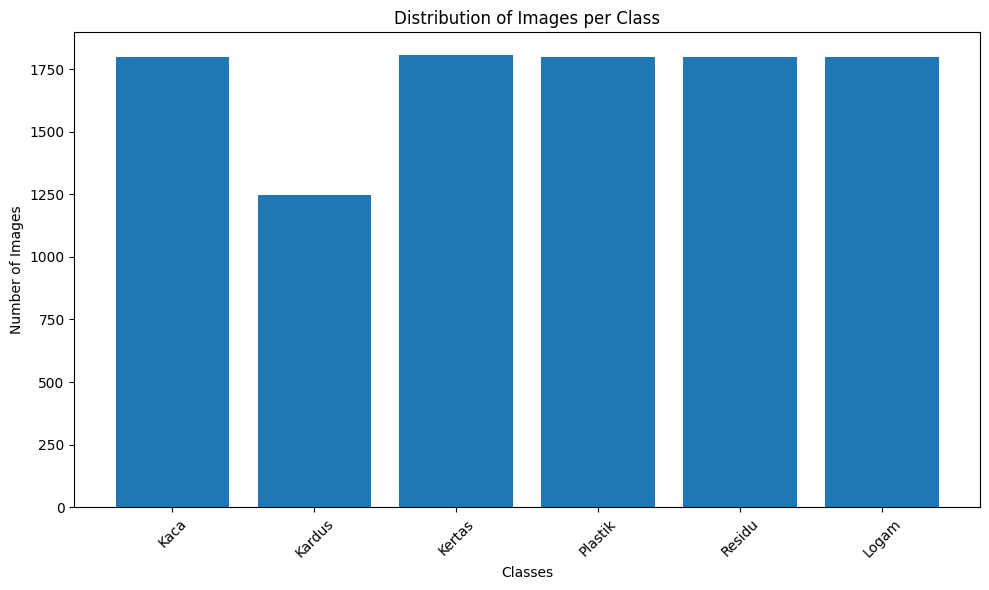

In [ ]:
dataset_path = "NEW_DATASETS"
classes = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Menghitung jumlah file di setiap kelas
class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}

# Membuat grafik distribusi
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Total dataset setelah augmentasi

In [ ]:
dataset_path = "NEW_DATASETS"

# Mendapatkan nama folder (kelas)
classes = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Menghitung jumlah gambar di setiap kelas dan total dataset
total_images = 0
print("Total Images Per Class:")
for cls in classes:
    class_path = os.path.join(dataset_path, cls)
    num_images = len([img for img in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, img))])
    total_images += num_images
    print(f" - {cls}: {num_images} images")

print(f"\nTotal Dataset: {total_images} images")


Total Images Per Class:
 - Kaca: 1800 images
 - Kardus: 1248 images
 - Kertas: 1807 images
 - Plastik: 1800 images
 - Residu: 1800 images
 - Logam: 1800 images

Total Dataset: 10255 images


# Split dataset

In [7]:
# Path dataset input dan output
input_dataset_path = "NEW_DATASETS"
output_dataset_path = "split_dataset"

# Pastikan folder output ada
os.makedirs(output_dataset_path, exist_ok=True)

# Subfolder untuk split dataset
train_path = os.path.join(output_dataset_path, "train")
val_path = os.path.join(output_dataset_path, "val")

# Pastikan subfolder ada
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

# Split ratio
train_ratio = 0.7
val_ratio = 0.3

# Iterasi untuk setiap kelas
for class_name in os.listdir(input_dataset_path):
    class_input_path = os.path.join(input_dataset_path, class_name)

    # Cek apakah folder
    if os.path.isdir(class_input_path):
        print(f"Splitting data for class '{class_name}'...")

        # Membuat subfolder untuk setiap kelas di folder split
        class_train_path = os.path.join(train_path, class_name)
        class_val_path = os.path.join(val_path, class_name)
        os.makedirs(class_train_path, exist_ok=True)
        os.makedirs(class_val_path, exist_ok=True)

        # Mengambil semua file di kelas ini
        all_files = [f for f in os.listdir(class_input_path) if os.path.isfile(os.path.join(class_input_path, f))]

        # Membagi dataset
        train_files, val_files = train_test_split(all_files, test_size=val_ratio, random_state=42)

        # Copy file ke masing-masing folder
        for file_name in train_files:
            shutil.copy2(os.path.join(class_input_path, file_name), os.path.join(class_train_path, file_name))
        for file_name in val_files:
            shutil.copy2(os.path.join(class_input_path, file_name), os.path.join(class_val_path, file_name))

        print(f"Class '{class_name}': {len(train_files)} train, {len(val_files)} val files.")

print(f"\nDataset split completed! Splits saved in '{output_dataset_path}'.")


Splitting data for class 'Kaca'...
Class 'Kaca': 1260 train, 540 val files.
Splitting data for class 'Kardus'...
Class 'Kardus': 873 train, 375 val files.
Splitting data for class 'Kertas'...
Class 'Kertas': 1264 train, 543 val files.
Splitting data for class 'Plastik'...
Class 'Plastik': 1260 train, 540 val files.
Splitting data for class 'Residu'...
Class 'Residu': 1260 train, 540 val files.
Splitting data for class 'Logam'...
Class 'Logam': 1260 train, 540 val files.

Dataset split completed! Splits saved in 'split_dataset'.


# Preprocessing

In [8]:
# Path ke dataset yang telah di-split
train_path = "split_dataset/train"
val_path = "split_dataset/val"

# Dimensi gambar
img_width, img_height = 128, 128

# Hyperparameters
batch_size = 32
epochs = 50

In [9]:
# Data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalisasi untuk training dataset (tanpa augmentasi)
train_datagen = ImageDataGenerator(rescale=1.0/255)

# Normalisasi untuk validation dataset
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Generator untuk training dataset
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Generator untuk validation dataset
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 7177 images belonging to 6 classes.
Found 3078 images belonging to 6 classes.


In [ ]:
print(train_generator.class_indices)

{'Kaca': 0, 'Kardus': 1, 'Kertas': 2, 'Logam': 3, 'Plastik': 4, 'Residu': 5}


# CNN


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

learning_rate = 0.0001

# Definisi model CNN
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Optimizer dengan learning rate
optimizer = Adam(learning_rate=learning_rate)

# Kompilasi model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Ringkasan model
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,064,518 (99.43 MB)

 Trainable params: 26,064,518 (99.43 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Latih model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    batch_size=batch_size
)

Epoch 1/25
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 86ms/step - accuracy: 0.2659 - loss: 1.7086 - val_accuracy: 0.4263 - val_loss: 1.4632
Epoch 2/25
225/225 ━━━━━━━━━━━━━━━━━━━━ 36s 70ms/step - accuracy: 0.4510 - loss: 1.4312 - val_accuracy: 0.4903 - val_loss: 1.3472
Epoch 3/25
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.5026 - loss: 1.2938 - val_accuracy: 0.5562 - val_loss: 1.2042
Epoch 4/25
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.5575 - loss: 1.1611 - val_accuracy: 0.5724 - val_loss: 1.1670
Epoch 5/25
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 67ms/step - accuracy: 0.5993 - loss: 1.0652 - val_accuracy: 0.6069 - val_loss: 1.0909
Epoch 6/25
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.6503 - loss: 0.9566 - val_accuracy: 0.6066 - val_loss: 1.0756
Epoch 7/25
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.6988 - loss: 0.8548 - val_accuracy: 0.6222 - val_loss: 1.0583
Epoch 8/25
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.7277 - loss: 0.7544 - 

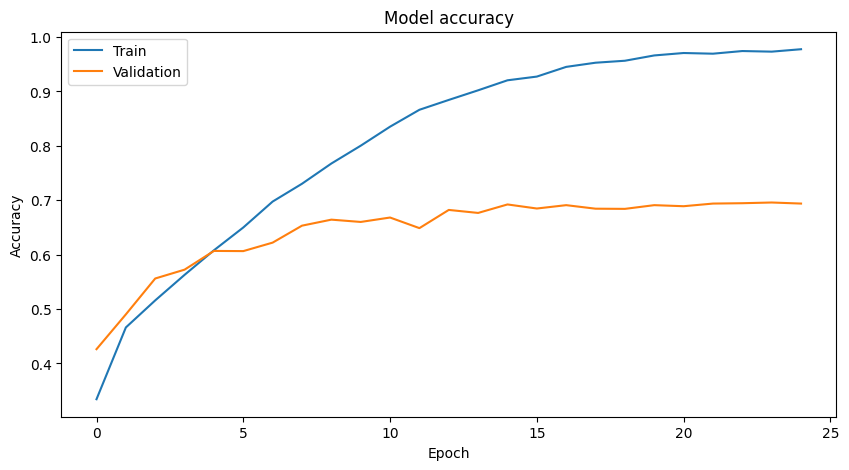

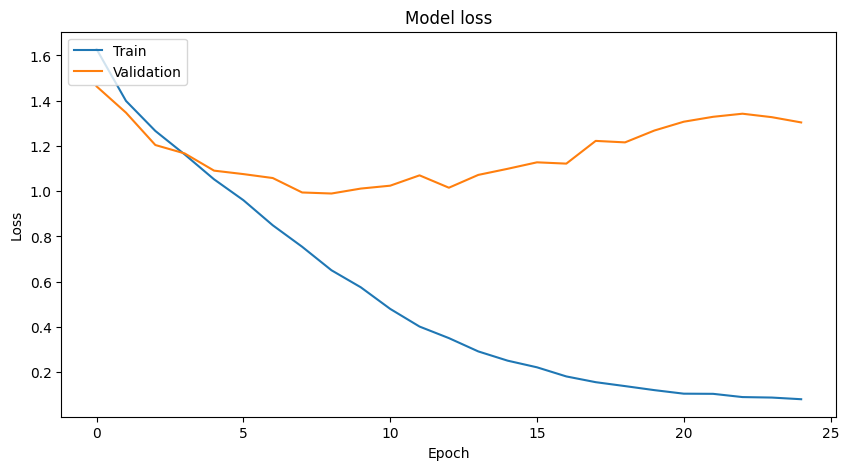

In [23]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
# Prediksi pada data validation (atau test jika digunakan)
val_generator.reset()
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Klasifikasi Report
target_names = list(val_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)


97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step

Classification Report:
              precision    recall  f1-score   support

        Kaca       0.72      0.73      0.72       540
      Kardus       0.73      0.75      0.74       375
      Kertas       0.74      0.65      0.69       543
       Logam       0.64      0.69      0.66       540
     Plastik       0.66      0.69      0.67       540
      Residu       0.69      0.69      0.69       540

    accuracy                           0.69      3078
   macro avg       0.70      0.70      0.70      3078
weighted avg       0.70      0.69      0.69      3078


Confusion Matrix:
[[392  15  18  57  35  23]
 [ 15 280  20  35   9  16]
 [ 17  34 353  51  39  49]
 [ 37  26  22 370  58  27]
 [ 43   8  35  35 370  49]
 [ 41  18  31  30  49 371]]


In [ ]:
# Simpan model
model.save('final_model.h5')
print("Model saved as 'final_model.h5'")

# Pre train

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Jumlah kelas
num_classes = train_generator.num_classes

# Load MobileNetV2 sebagai base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze semua layer dari base model agar tidak di-train ulang
base_model.trainable = False

# Custom layer
custom_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Kompilasi model
custom_model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Learning rate yang lebih kecil karena transfer learning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Ringkasan model
custom_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Calculate class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

# Convert class weights to dictionary
class_weight_dict = dict(enumerate(class_weights))

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)

# Train the model with class weights
history = custom_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    batch_size=batch_size,
    class_weight=class_weight_dict, # Use class weights
    callbacks=[early_stop, reduce_lr] # Use callbacks
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


223/223 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.3467 - loss: 1.7539 - val_accuracy: 0.7342 - val_loss: 0.8044 - learning_rate: 1.0000e-04
Epoch 2/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 33s 64ms/step - accuracy: 0.6713 - loss: 0.8964 - val_accuracy: 0.7860 - val_loss: 0.6289 - learning_rate: 1.0000e-04
Epoch 3/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 16s 69ms/step - accuracy: 0.7512 - loss: 0.7275 - val_accuracy: 0.8076 - val_loss: 0.5627 - learning_rate: 1.0000e-04
Epoch 4/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.7780 - loss: 0.6165 - val_accuracy: 0.8240 - val_loss: 0.5199 - learning_rate: 1.0000e-04
Epoch 5/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.8135 - loss: 0.5454 - val_accuracy: 0.8289 - val_loss: 0.4953 - learning_rate: 1.0000e-04
Epoch 6/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.8305 - loss: 0.4949 - val_accuracy: 0.8378 - val_loss: 0.4721 - learning_rate: 1.0000e-04
Epoch 7/20
223/223 ━━━━━━━━━━━━━━━━━━━━ 22s 67ms/step - accurac

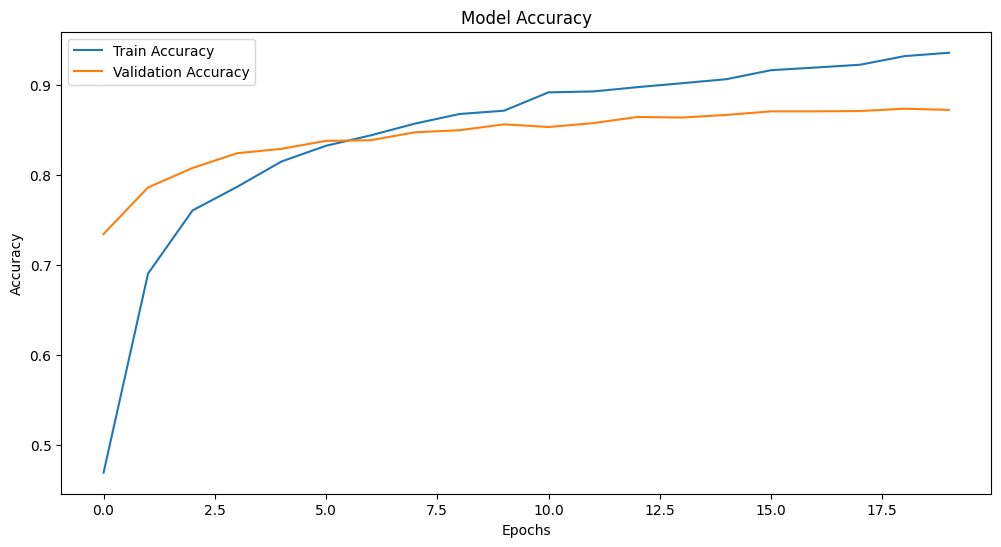

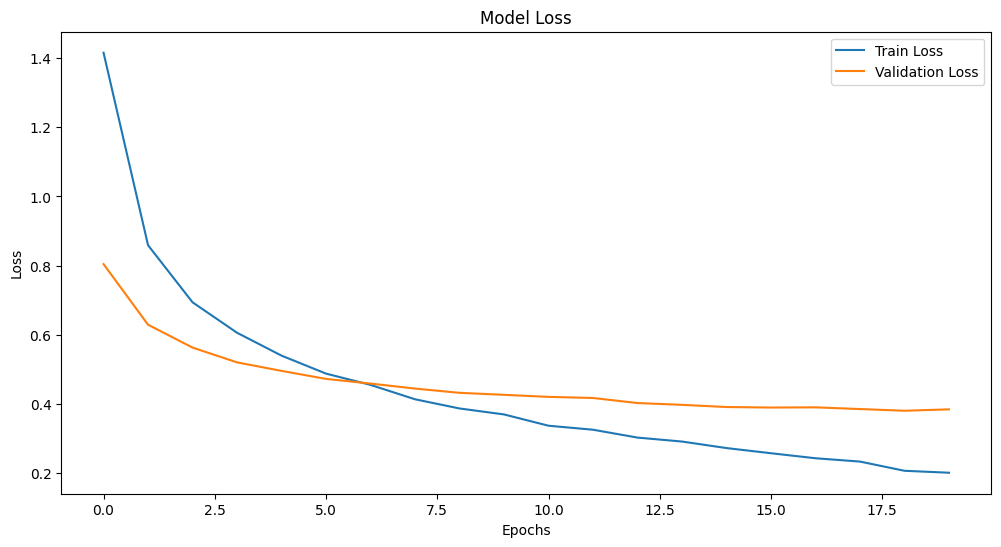

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Prediksi pada validation dataset
val_generator.reset()
y_pred = custom_model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Klasifikasi Report
from sklearn.metrics import classification_report, confusion_matrix

target_names = list(val_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=target_names))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
print(conf_matrix)

96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step

Classification Report:
              precision    recall  f1-score   support

        Kaca       0.91      0.88      0.89       535
      Kardus       0.87      0.92      0.90       369
      Kertas       0.90      0.88      0.89       543
       Logam       0.87      0.89      0.88       536
     Plastik       0.85      0.82      0.84       538
      Residu       0.85      0.85      0.85       530

    accuracy                           0.87      3051
   macro avg       0.87      0.88      0.87      3051
weighted avg       0.87      0.87      0.87      3051


Confusion Matrix:
[[471   3   3  19  30   9]
 [  1 341   7   5   1  14]
 [  2  21 480  10  10  20]
 [ 18   3   6 479  23   7]
 [ 18   4  22  22 441  31]
 [  8  21  18  17  13 453]]


In [ ]:
# prompt: simpan model mobilenet dan download

from google.colab import files
custom_model.save('mobilenet_model.h5')
files.download('mobilenet_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>